## The following one code cell is the same thing as `data.ipynb` in the Github

In [17]:
# %% [markdown]
# # Data Preprocessing and Report
# - The dataset I have select for project 4 is related to the fetal health. (The reference of the dataset is here: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
# - The main task for this part is to get cleaned data and have a basic sense of what are things that can determine the fetal health.
# - After this part, I will use FastApi implement continous intergration and continuous delivery for this data enginerring project.

# %% [markdown]
# # Import the packages

# %%
import pandas as pd
import numpy as np
import altair as alt


# %% [markdown]
# # Load dataset

# %%
df = pd.read_csv('fetal_health.csv')
df.head()

# %%
df.shape

# %% [markdown]
# - There are 2126 entires in the dataset and 22 columns.

# %% [markdown]
# ## Data Exploration
# - This is a classification problem and we need to figure out the algorithom that best predict the fetal health status, which is in the following 3 categories: "Noraml", "Suspect", and "Pathological", and they are encoded into floats.

# %%
# Here is the basic statistics for all columns in the df
df.describe()

# %%
# to check if there's any null values in the df
df.isnull().sum(axis=0)

# %%
# to check the datatypes of each column
df.dtypes

# %%
# We need to find out the output variable
df.columns

# %%
# check the value counts of the output variable `fetal_health`
df[['fetal_health']].value_counts()

# %%
df.iloc[:,0:21]

# %% [markdown]
# - Check if there's multicollinearity among the variables in the dataset

# %%
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = df.iloc[:,0:21] # I exclude the output variable 

# set up a VIF dataframe
vif_data = pd.DataFrame()
vif_data["predictor"] = X.columns
  
# calculating VIF 
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

# %% [markdown]
# - We are concerned about the ` baseline value`, `histogram_width`, and such variables that have a vif that is greater than 500. I need to take care of these variables when doing the modeling part.

# %%

# %% [markdown]
# # Exploratory Data Analysis

# %%
df.columns


# %% [markdown]
# # Modeling
# - Logistic Regression
# - KNN
# 




/opt/miniconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                            predictor          VIF
0                                      baseline value  1058.823853
1                                       accelerations     4.801485
2                                      fetal_movement     1.184827
3                                uterine_contractions     4.034365
4                                 light_decelerations     4.799432
5                                severe_decelerations     1.136294
6                            prolongued_decelerations     2.926905
7                     abnormal_short_term_variability    16.051631
8                mean_value_of_short_term_variability     9.457023
9   percentage_of_time_with_abnormal_long_term_var...     2.417343
10                mean_value_of_long_term_variability     6.309741
11                                    histogram_width          inf
12                                      histogram_min          inf
13                                      histogram_max         

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# Here is the start of my EDA portion

In [18]:
df['fetal_health']= df['fetal_health'].astype('category')

In [19]:
# create a density plot for fetal_health using altair
alt.Chart(df).mark_bar().encode(
    alt.X('fetal_health', bin=True),
    y='count()',
    color='fetal_health'
).properties(
    width=600,
    height=400
)


/opt/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Most fetals are in the Group 1, which is a health fetal.


In [20]:
# draw a correlation matrix for the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


/var/folders/_1/lp5kp6tj2lsd_ry1fksy95kc0000gn/T/ipykernel_97381/2044993254.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481


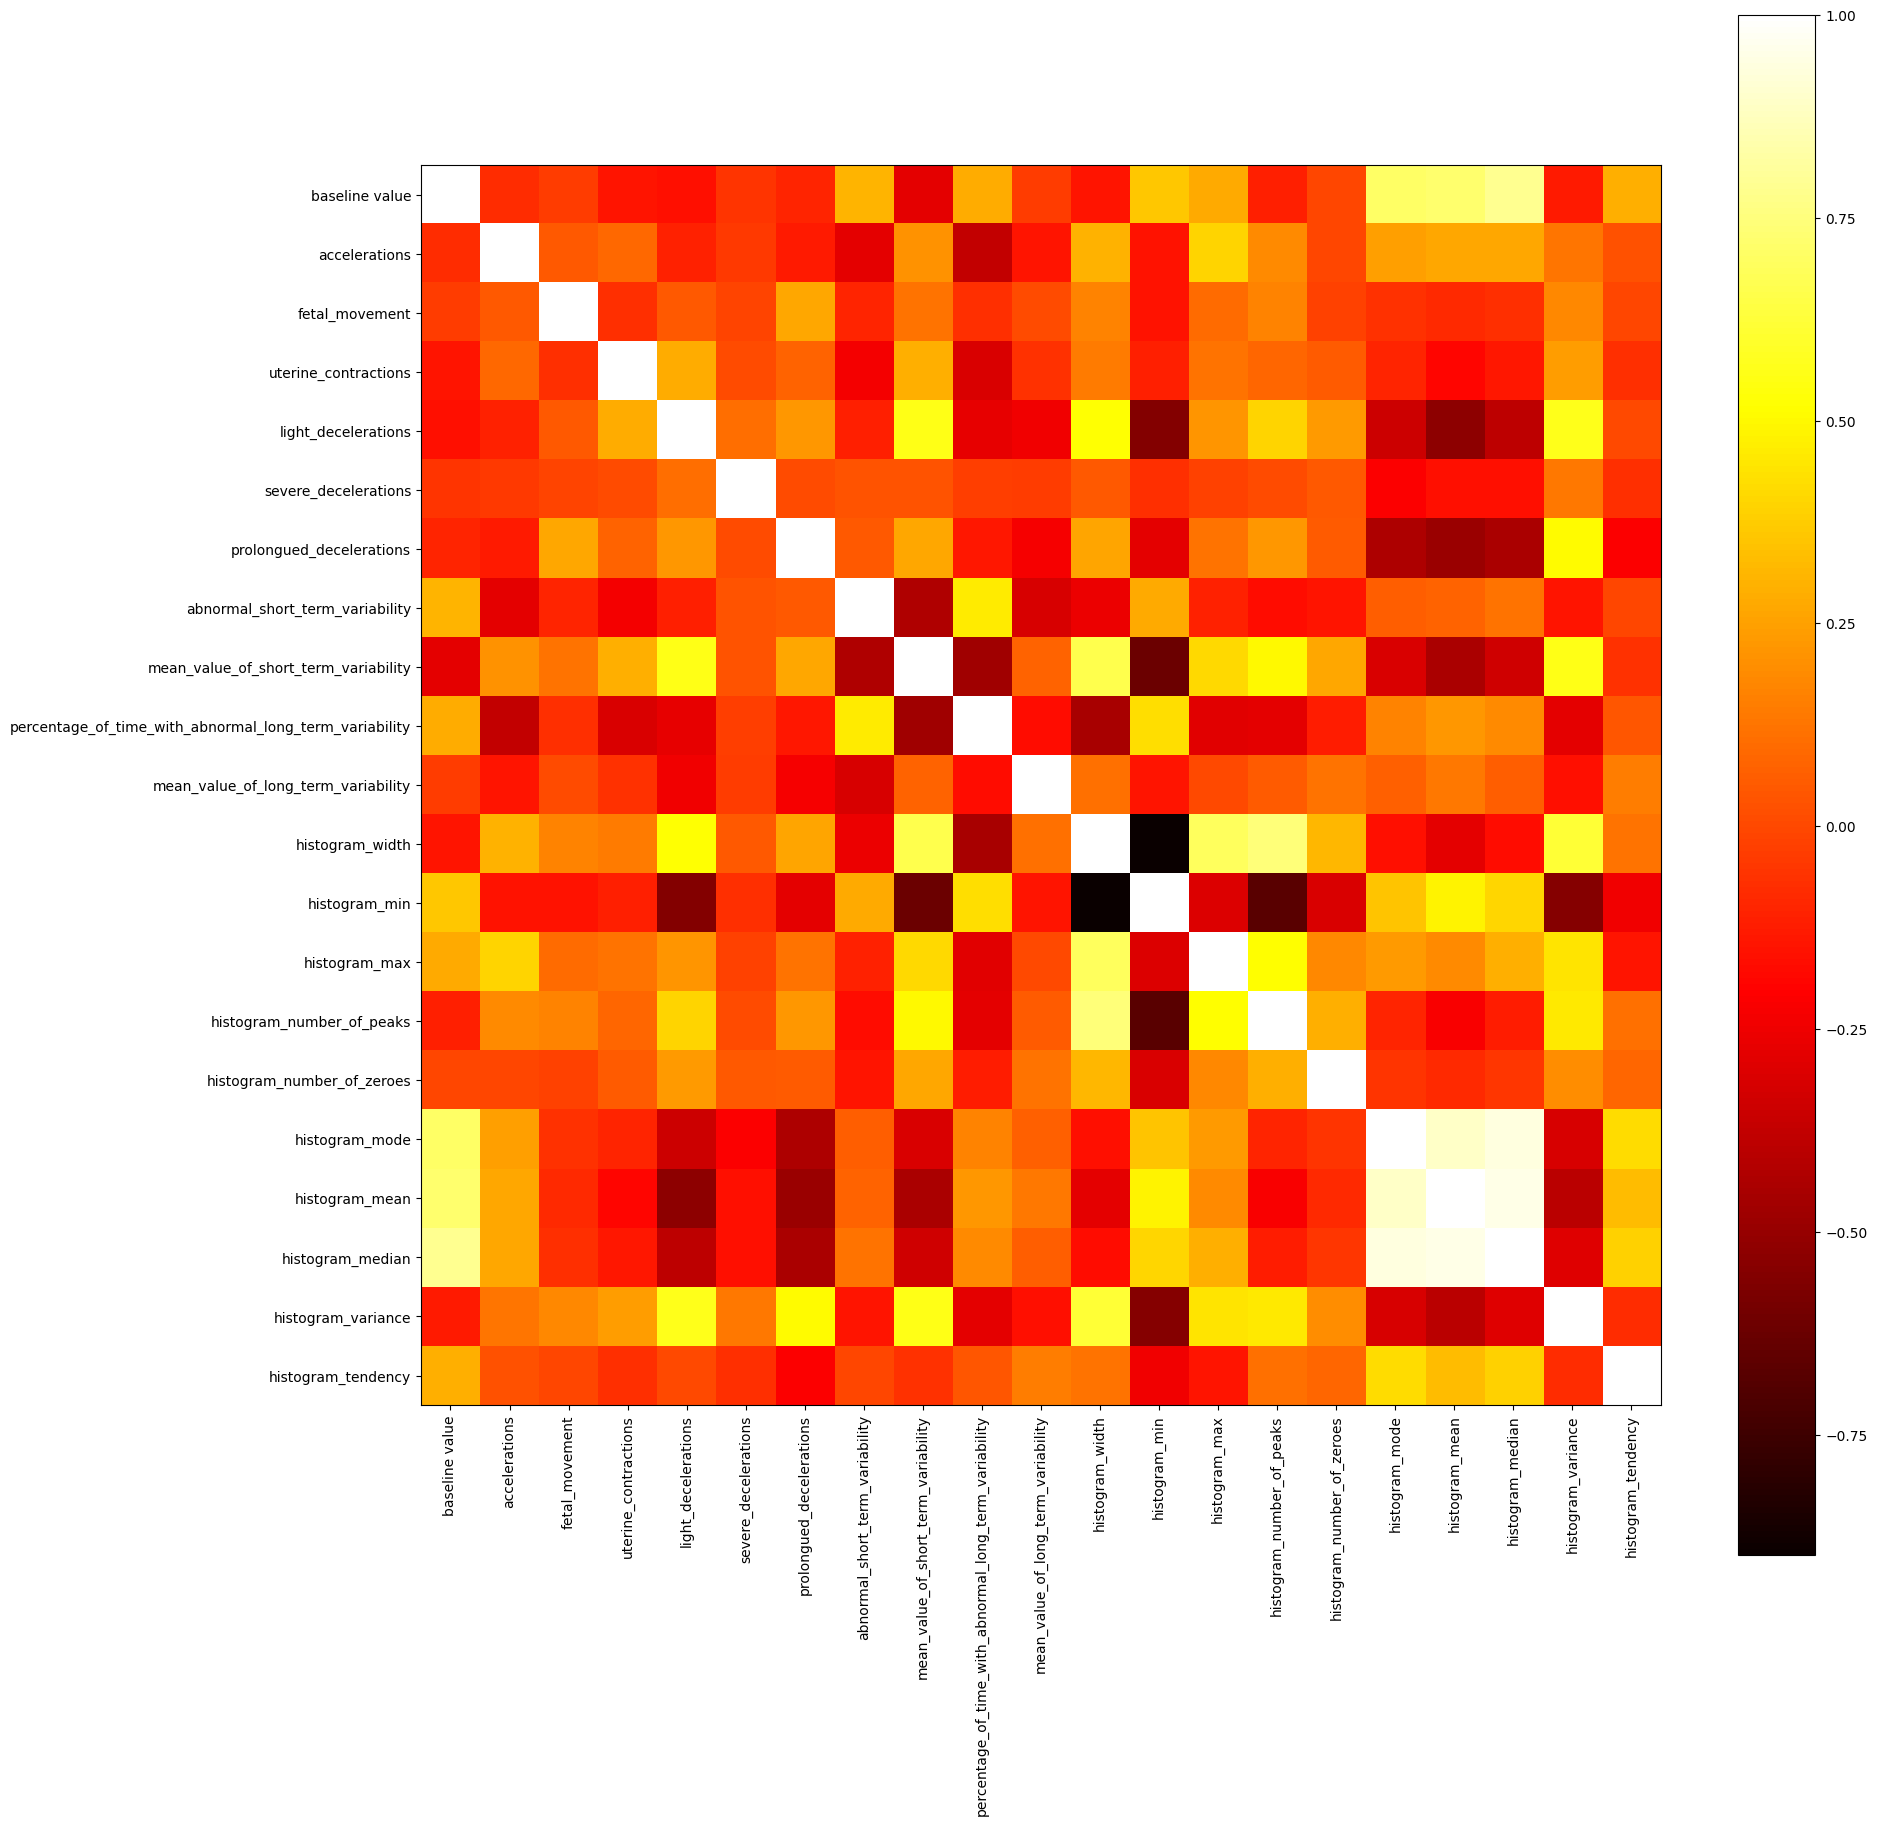

In [21]:
import matplotlib.pyplot as plt
# draw a heatmap for the correlation matrix
plt.figure(figsize=(20,20))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.show()

## Modeling
- In the following code blocks, I am using the KNN, Random Forest, Logistic Regression, XGBoost models to test out the model using metrics accuracy_score
- I am taking 80% of the data as training, and the remaining 20% as testing data
- I choose the random_state = 34 because 34 is my luckly number

In [22]:
# fit a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the dataset into train and test and make 80% of the data as train set and set the random state to 34
X = df.iloc[:,0:21]
y = df.iloc[:,21]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# fit a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict the test set
y_pred = knn.predict(X_test)

# calculate the accuracy score
accuracy_score(y_test, y_pred)

0.8802816901408451

In [23]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression

# split the dataset into train and test and make 80% of the data as train set and set the random state to 34
X = df.iloc[:,0:21]
y = df.iloc[:,21]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict the test set
y_pred = logreg.predict(X_test)

# calculate the accuracy score
accuracy_score(y_test, y_pred)


/opt/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8427230046948356

In [24]:
# fit a random forest model
from sklearn.ensemble import RandomForestClassifier

# split the dataset into train and test and make 80% of the data as train set and set the random state to 34
X = df.iloc[:,0:21]
y = df.iloc[:,21]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# fit a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test set
y_pred = rf.predict(X_test)

# calculate the accuracy score
accuracy_score(y_test, y_pred)


0.9248826291079812

In [25]:
# fit a SVM model
from sklearn.svm import SVC

# split the dataset into train and test and make 80% of the data as train set and set the random state to 34
X = df.iloc[:,0:21]
y = df.iloc[:,21]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# fit a SVM model
svm = SVC()
svm.fit(X_train, y_train)

# predict the test set
y_pred = svm.predict(X_test)

# calculate the accuracy score
accuracy_score(y_test, y_pred)


0.8356807511737089

In [26]:
# change the output variable to categorical and encode them into 0, 1, 2 because I encountered an error when I tried to run the model below. Thus I encoded the output variable into 0, 1, 2 instead of 1, 2, 3. It just for the model accuracy.
df['fetal_health_1']= df['fetal_health'].astype('category')
df['fetal_health_1'] = df['fetal_health_1'].cat.codes
df['fetal_health_1'] .value_counts()


0    1655
1     295
2     176
Name: fetal_health_1, dtype: int64

In [27]:
# fit a XGBoost model
from xgboost import XGBClassifier

# split the dataset into train and test and make 80% of the data as train set and set the random state to 34
X = df.iloc[:,0:21]
y = df.iloc[:,22]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# fit a XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test set
y_pred = xgb.predict(X_test)

# calculate the accuracy score
accuracy_score(y_test, y_pred)

0.9413145539906104